# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [29]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.stats as st
import sklearn
import seaborn as sns

In [10]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [11]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

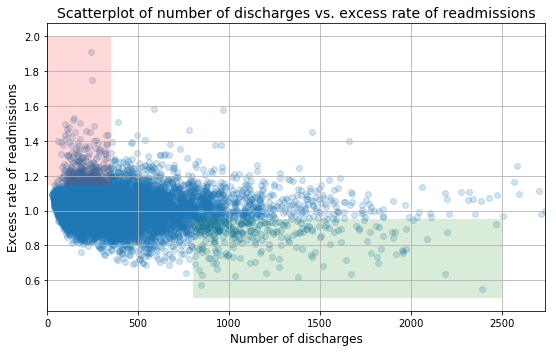

In [12]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

## A. Do I agree with the analysis:
A. Initial observations based on the plot above

Overall, rate of readmissions is trending down with increasing number of discharges
-No, I'm not convinced beyond doubt this is true. There is a bump up of points at the lower end, but I'm not sure if its significant.
B. Statistics

In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1
In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1
C. Conclusions

There is a significant correlation between hospital capacity (number of discharges) and readmission rates.
-Again, I don't see the proper justification for this statement.
D. Regulatory policy recommendations
-Not strong enough analysis to make recomendation

## B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

- Setup an appropriate hypothesis test.
- Compute and report the observed significance value (or p-value).
- Report statistical significance for  αα  = .01.
- Discuss statistical significance and practical significance. 

Ho:There is no difference between excess readmission rate in both groups.

Ha: There is a difference

In [13]:
clean_hospital_read_df.head(2)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [14]:
df=clean_hospital_read_df
dfdis= df['Number of Discharges']

print "The number of hospitals with a number of discharges < 100 is :", len(dfdis[(dfdis<100) & (dfdis>0)]), "while >1000: ", str(len(dfdis[dfdis>1000]))

The number of hospitals with a number of discharges < 100 is : 1188 while >1000:  463


In [16]:
df100 = df[(df['Number of Discharges'] < 100) & (df['Number of Discharges'] > 0)]

# 63% have excess readmission rate greater than 1
a= len(df100) #number of hospitals with <100
ratio= df100[(df100["Excess Readmission Ratio"]>1)]
b= len(ratio["Excess Readmission Ratio"])
percentage=round((float(b)/a)*100,2)

mean_100 = round(df100["Excess Readmission Ratio"].mean(),4)

print "The mean of excess readmission rate is : ",mean_100," and the excess readmition rate is: ",percentage, '%'

The mean of excess readmission rate is :  1.0226  and the excess readmition rate is:  63.22 %


In [18]:
df1000 = df[(df['Number of Discharges'] > 1000)]

# 44% have excess readmission rate greater than 1
a= len(df1000) #number of hospitals with >1000
ratio= df1000[(df1000["Excess Readmission Ratio"]>1)]
b= len(ratio["Excess Readmission Ratio"])
percentage=round((float(b)/a)*100,2)

mean_1000=round(df1000["Excess Readmission Ratio"].mean(),4)


print "The mean of excess readmission rate is : ",mean_1000," and the excess readmition rate is: ",percentage, '%'

The mean of excess readmission rate is :  0.9783  and the excess readmition rate is:  44.49 %


The mean is 1.0226 and its standard deviation is 0.058


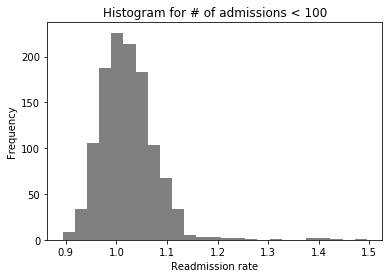

In [19]:
df100["Excess Readmission Ratio"].plot(kind='hist',color='0.5', bins = 25, title = 'Histogram for # of admissions < 100').set_xlabel('Readmission rate')
st_100=round((df100["Excess Readmission Ratio"]).std(),4)
print "The mean is {} and its standard deviation is {}".format(mean_100, st_100)

The mean is 0.9783 and its standard deviation is 0.12


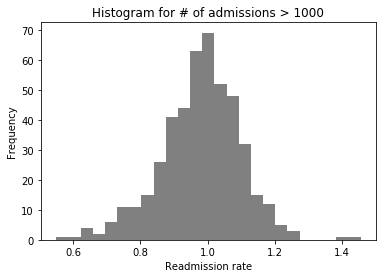

In [20]:
df1000["Excess Readmission Ratio"].plot(kind='hist',color='0.5', bins = 25, title = 'Histogram for # of admissions > 1000').set_xlabel('Readmission rate')
st_1000=round((df1000["Excess Readmission Ratio"]).std(),4)
print "The mean is {} and its standard deviation is {}".format(mean_1000, st_1000)

Null Hypothesis: There is no difference between the mean readmission rates of population 1 and population 2. Where population 1 is hosipitals with admissions <100 and population 2 is hosipitals with admissions >1000.

In [23]:
# Point estimate
x_hat_1=mean_100
x_hat_2=mean_1000
PS = round(x_hat_1-x_hat_2,4)

# Standard Error: FORMULA and Variables
s_1=st_100
n_1=len(dfdis[(dfdis<100) & (dfdis>0)])
s_2=st_1000
n_2=len(dfdis[(dfdis<100)])
SE =(((s_1*s_1)/n_1)+((s_2*s_2)/n_2) )**0.5
#round(SE,4)


# Z-score:
Z= PS/SE
#1-st.norm.cdf(Z)
Z

11.764632322612469

In [27]:
p_values = st.norm.sf(abs(Z))
p_values

2.9692245308049497e-32

Given a z score of 11.8 for a zero difference between the means of the two populations the probability of the Null Hypothesis being true is tiny, on the order of 10^-32. Given the unlikeliness of this outcome we can confidently reject the null hypothesis and claim there is a statistically significant difference between the population means.

To create a new recomendation, invesigate discharges <300

The mean is 1.0142 and its standard deviation is 0.0825


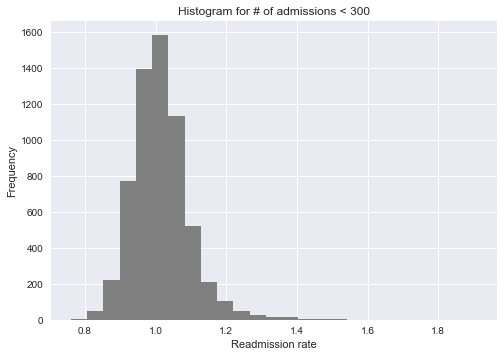

In [35]:
df300 = df[(df['Number of Discharges'] < 300) & (df['Number of Discharges'] > 0)]

df300["Excess Readmission Ratio"].plot(kind='hist',color='0.5', bins = 25, title = 'Histogram for # of admissions < 300').set_xlabel('Readmission rate')
st_300=round((df300["Excess Readmission Ratio"]).std(),4)
mean_300= round(df300["Excess Readmission Ratio"].mean(),4)


print "The mean is {} and its standard deviation is {}".format(mean_300, st_300)

Null Hypothesis: There is no difference between the mean readmission rates of population 1 and population 2. Where population 1 is hosipitals with admissions <300 and population 2 is hosipitals with admissions >1000.

In [37]:
# Point estimate
x_hat_3=mean_300
x_hat_2=mean_1000
PS = round(x_hat_3-x_hat_2,4)

# Standard Error: FORMULA and Variables
s_3=st_300
n_3=len(dfdis[(dfdis<300) & (dfdis>0)])
s_2=st_1000
n_2=len(dfdis[(dfdis<100)])
SE =(((s_3*s_3)/n_3)+((s_2*s_2)/n_2) )**0.5
#round(SE,4)


# Z-score:
Z_2= PS/SE
#1-st.norm.cdf(Z)
Z_2

10.169590134554486

In [39]:
p_values = st.norm.sf(abs(Z_2))

print "The p-value is:", p_values,"which is almost 0. We reject the null hypothesis as it is very improbable."

The p-value is: 1.35523392431e-24 which is almost 0. We reject the null hypothesis as it is very improbable.


The above recomendation for hospitals with small capacity is appropriate.

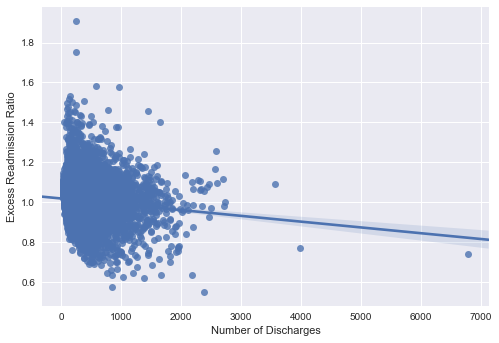

In [32]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions

sns.regplot(y="Excess Readmission Ratio", x="Number of Discharges", data=clean_hospital_read_df, fit_reg = True)
